# Matches Dataset

In [1]:
import pandas as pd # Library for Data Preprocessing
matches_data=pd.read_csv("matches.csv",parse_dates=["date"]) # Read the CSV File
matches_data.head() # Gives the first 5 entries 

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [2]:
matches_data.shape # Gives the shape of the dataset

(756, 18)

In [3]:
matches_data.describe() # Gives the statistical details

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [4]:
matches_data.info() # Gives the Count, Datatype and Memory Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               756 non-null    int64         
 1   season           756 non-null    int64         
 2   city             749 non-null    object        
 3   date             756 non-null    datetime64[ns]
 4   team1            756 non-null    object        
 5   team2            756 non-null    object        
 6   toss_winner      756 non-null    object        
 7   toss_decision    756 non-null    object        
 8   result           756 non-null    object        
 9   dl_applied       756 non-null    int64         
 10  winner           752 non-null    object        
 11  win_by_runs      756 non-null    int64         
 12  win_by_wickets   756 non-null    int64         
 13  player_of_match  752 non-null    object        
 14  venue            756 non-null    object   

## Data Preprocessing

## Missing Data

In [5]:
matches_data.isnull().sum() # Check null values in each column

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

City, Umpire, Winner, Player of Match consists of null values 

In [6]:
# Dropping the Umpire3 column as it has too many values
# Also dropping Umpire1 & Umpire2 column as it would have less importance 
matches_data.drop("umpire3",axis=1,inplace=True)
matches_data.drop(["umpire1","umpire2"],axis=1,inplace=True)

In [7]:
# Dealing with missing values in City
matches_data[matches_data["city"].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium


We can replace the null values with the venue

In [8]:
# Filling all null values in city column
matches_data["city"].fillna(matches_data["venue"].apply(lambda x:x[:5]),inplace=True)

In [9]:
# Dealing with missing values in winner column
matches_data[matches_data['winner'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
744,11340,2019,Bengaluru,2019-04-30,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium


In [10]:
# Replacing null values in winner with values in result
matches_data['winner'].fillna(matches_data['result'], inplace = True)

In [11]:
# Dealing with missing values in Player of Match colun
matches_data[matches_data['player_of_match'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,no result,0,0,NaN,Feroz Shah Kotla
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,no result,0,0,NaN,M Chinnaswamy Stadium
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,no result,0,0,NaN,M Chinnaswamy Stadium
744,11340,2019,Bengaluru,2019-04-30,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,no result,0,0,NaN,M. Chinnaswamy Stadium


In [12]:
# Replacing null values in player of match with values in result
matches_data['player_of_match'].fillna(matches_data['result'], inplace = True)

In [13]:
# Changing ID Numbers
matches_data["id"].unique()

array([    1,     2,     3,     4,     5,     6,     7,     8,     9,
          10,    11,    12,    13,    14,    15,    16,    17,    18,
          19,    20,    21,    22,    23,    24,    25,    26,    27,
          28,    29,    30,    31,    32,    33,    34,    35,    36,
          37,    38,    39,    40,    41,    42,    43,    44,    45,
          46,    47,    48,    49,    50,    51,    52,    53,    54,
          55,    56,    57,    58,    59,    60,    61,    62,    63,
          64,    65,    66,    67,    68,    69,    70,    71,    72,
          73,    74,    75,    76,    77,    78,    79,    80,    81,
          82,    83,    84,    85,    86,    87,    88,    89,    90,
          91,    92,    93,    94,    95,    96,    97,    98,    99,
         100,   101,   102,   103,   104,   105,   106,   107,   108,
         109,   110,   111,   112,   113,   114,   115,   116,   117,
         118,   119,   120,   121,   122,   123,   124,   125,   126,
         127,   128,

In [14]:
a=636
for i in range(7894,11416):
    if i in matches_data[matches_data["id"]>636]["id"].unique():
        a=a+1
    matches_data["id"].replace(i,a,inplace=True)

## Checking the Data

In [15]:
# Checking for unique values in city
matches_data["city"].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali', 'Bengaluru'], dtype=object)

In [16]:
# Replacing wrong city names with correct one
matches_data["city"].replace('Bengaluru', 'Bangalore', inplace=True)

In [17]:
# Checking for unique values in team
matches_data["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [18]:
# Replace RPS AND DD with correct names
matches_data.replace('Rising Pune Supergiant', 'Rising Pune Supergiants', inplace=True)
matches_data.replace('Delhi Daredevils', 'Delhi Capitals', inplace=True)

## Exploratory Data Analysis

### Number of Matches held each Season

C:\Users\91961\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0, 0.5, 'Number of Matches')

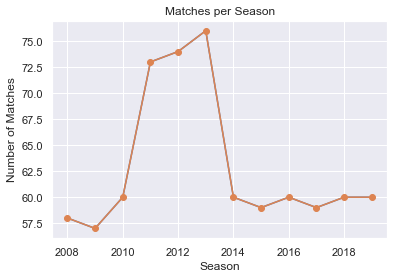

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["figure.figsize"]=(12,12)
sns.set()
%matplotlib inline

# Using Seaborn 
no_matches=pd.DataFrame(matches_data.groupby("season")["id"].count())
sns.lineplot(x=no_matches.index,y="id",data=no_matches,marker="o")
plt.ylabel("Number of Matches")
plt.title("Matches Per Season")

# Using Matplotlib
plt.plot(matches_data.groupby("season")["id"].count(),marker="o")
plt.title("Matches per Season")
plt.xlabel("Season")
plt.ylabel("Number of Matches")

It was evident that most number of matches were held in Season 2013

### Number of Matches won by each team in each season

2008
winner
Rajasthan Royals               13
Kings XI Punjab                10
Chennai Super Kings             9
Delhi Capitals                  7
Mumbai Indians                  7
Kolkata Knight Riders           6
Royal Challengers Bangalore     4
Deccan Chargers                 2
Name: winner, dtype: int64
2009
winner
Delhi Capitals                 10
Deccan Chargers                 9
Royal Challengers Bangalore     9
Chennai Super Kings             8
Kings XI Punjab                 7
Rajasthan Royals                6
Mumbai Indians                  5
Kolkata Knight Riders           3
Name: winner, dtype: int64
2010
winner
Mumbai Indians                 11
Chennai Super Kings             9
Deccan Chargers                 8
Royal Challengers Bangalore     8
Delhi Capitals                  7
Kolkata Knight Riders           7
Rajasthan Royals                6
Kings XI Punjab                 4
Name: winner, dtype: int64
2011
winner
Chennai Super Kings            11
Mumbai Indians       

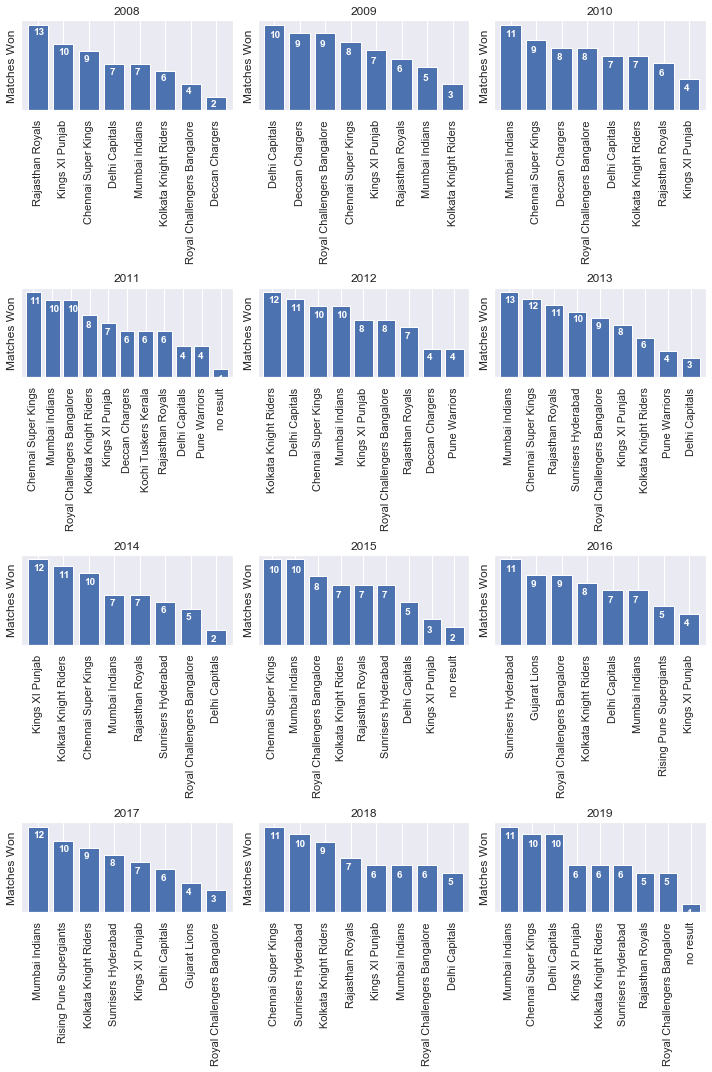

In [20]:
max_winner = matches_data.groupby('season')['winner'].value_counts()
count = 1
fig = plt.figure()
groups = max_winner.groupby('season')

for year,group in groups:
    ax = fig.add_subplot(4,3,count)
    ax.set_title(year)
    print(year)
    print(group[year])
    ax=group[year].plot(kind="bar",figsize=(10,15),width=0.8)
    count=count+1
    plt.xlabel('')
    plt.yticks([])
    plt.ylabel('Matches Won')
    
    for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()+0.2, i.get_height()-1.5,s= i.get_height(),color="white",fontweight='bold')
        
plt.tight_layout()
plt.show()

Mumbai Indians and Chennai Super Kings have won most Matches

### Success Rate of Each Team

In [21]:
def annot_plot(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))

Chennai Super Kings            60.975610
Deccan Chargers                38.666667
Delhi Capitals                 43.502825
Gujarat Lions                  43.333333
Kings XI Punjab                46.590909
Kochi Tuskers Kerala           42.857143
Kolkata Knight Riders          51.685393
Mumbai Indians                 58.288770
Pune Warriors                  26.086957
Rajasthan Royals               51.020408
Rising Pune Supergiants        50.000000
Royal Challengers Bangalore    46.666667
Sunrisers Hyderabad            53.703704
no result                            NaN
dtype: float64


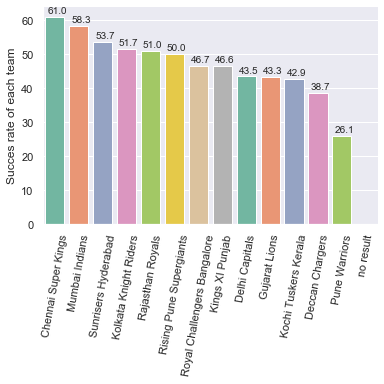

In [22]:
matches_won = matches_data.groupby('winner').count()
total_matches = matches_data['team1'].value_counts()+ matches_data['team2'].value_counts()
success_rate = (matches_won["id"]/total_matches)*100
print(success_rate)

data = success_rate.sort_values(ascending = False)
ax = sns.barplot(x = data.index, y = data, palette="Set2");
plt.ylabel('Succes rate of each team')
plt.xticks(rotation=80)
annot_plot(ax,0.08,1)

Chennai Super Kings have highest winning rate followed by Mumbai Indians

### Best Defending Teams

Text(0.5, 1, 'Best Defending Teams')

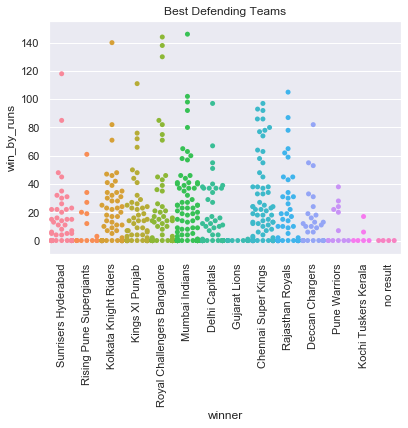

In [23]:
sns.swarmplot(y='win_by_runs',x='winner',data=matches_data)
plt.tight_layout()
plt.xticks(rotation=90)
plt.title('Best Defending Teams')

Chennai Super Kings and Mumbai Indians are best Defending Teams

### Best Chasing Teams

Text(0.5, 1.0, 'Best Chasing Team')

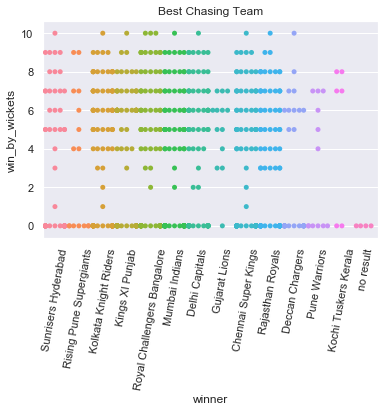

In [24]:
sns.swarmplot(y='win_by_wickets',x='winner',data=matches_data)
plt.xticks(rotation=80)
plt.title('Best Chasing Team')

### Toss Winner is Game Winner

Text(0.5, 1.0, 'Toss Decision for which Toss Winner is Game Winner')

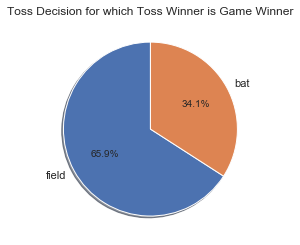

In [25]:
import numpy as np
toss_winner = matches_data['toss_decision'][matches_data['toss_winner'] == matches_data['winner']].value_counts()
labels=np.array(toss_winner.index)
sizes = toss_winner.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Toss Decision for which Toss Winner is Game Winner')

__65.9%__ of the toss winning teams had decided to __field__ first while __34.1%__ had decided to __Bat__ first and won the matches.

### Best Venue for Batting or Fielding

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text xticklabel objects>)

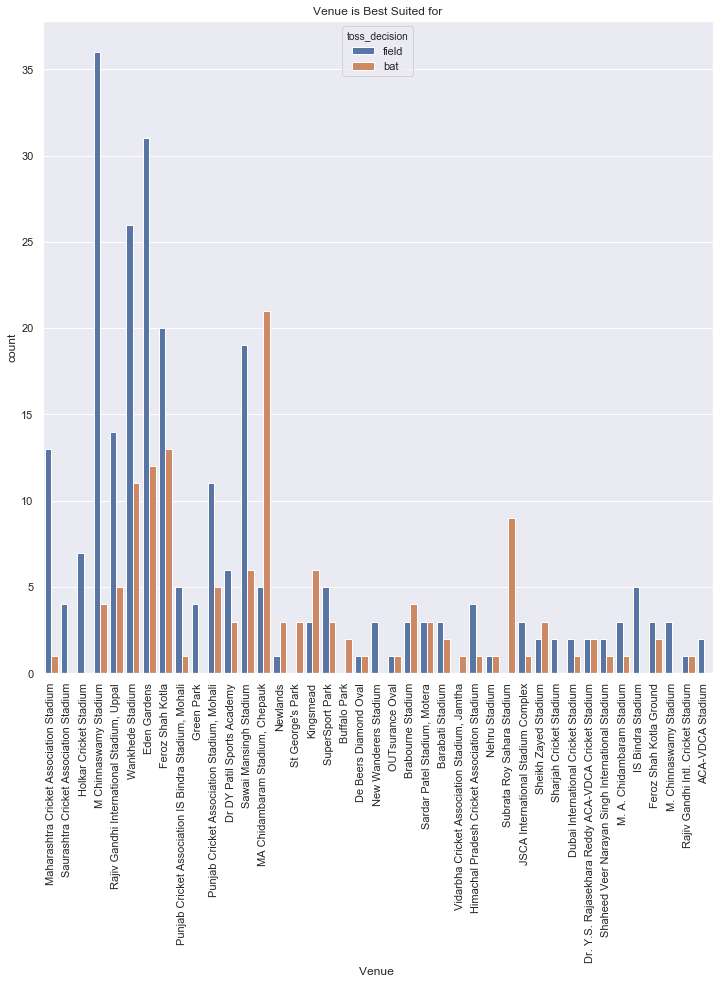

In [26]:
mpl.rcParams["figure.figsize"]=(12,12)
venue =matches_data[matches_data['toss_winner'] == matches_data['winner']]
sns.countplot(x='venue',hue='toss_decision',data=venue)
plt.xlabel('Venue ')
plt.title('Venue is Best Suited for')
plt.xticks(rotation=90)

__M Chinnaswamy stadium and Eden Gardens__ is best Suited for Feilding and __MA Chidambaram Stadium ,Chepauk__ is best suited for Batting.

In [27]:
matches_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


# Deliveries Dataset 

In [28]:
deliveries_data=pd.read_csv("deliveries.csv")
deliveries_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [29]:
deliveries_data.shape

(179078, 21)

In [30]:
deliveries_data.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [31]:
deliveries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

## Exploratory Data Analysis

### Top 10 Batsman

In [32]:
import plotly.express as px
batting=deliveries_data.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
batting_sorted=batting.sort_values(by='Runs',ascending=False)
top_batsmen=batting_sorted[:10] 
print('Top 10 Batsmen :\n',top_batsmen)
fig = px.bar(top_batsmen, x='batsman', y='Runs',
             hover_data=['batsman'], color='Runs',title='Top 10 Batsmen in IPL- Seasons 2008-2019')

Top 10 Batsmen :
             batsman  Runs
486         V Kohli  5434
428        SK Raina  5415
367       RG Sharma  4914
112       DA Warner  4741
392        S Dhawan  4632
92         CH Gayle  4560
290        MS Dhoni  4477
384      RV Uthappa  4446
26   AB de Villiers  4428
147       G Gambhir  4223


### Top 10 Bowlers

In [33]:
bowling_wickets=deliveries_data[deliveries_data['dismissal_kind']!='run out']
bowling=bowling_wickets.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wicket_count=bowling.groupby('bowler').count().reset_index()
bowling_top=bowling_wicket_count.sort_values(by='Wickets',ascending=False)
top_bowlers=bowling_top.loc[:,['bowler','Wickets']][0:10] 
print('The Top Wicket Takers in the Tournament are:\n',top_bowlers)
fig = px.bar(top_bowlers, x='bowler', y='Wickets',
             hover_data=['bowler'], color='Wickets',title='Top 10 Bowlers in IPL- Seasons 2008-2019')

The Top Wicket Takers in the Tournament are:
               bowler  Wickets
290       SL Malinga      170
6           A Mishra      156
110  Harbhajan Singh      150
227        PP Chawla      149
82          DJ Bravo      147
46           B Kumar      133
232         R Ashwin      125
296        SP Narine      122
326         UT Yadav      119
244        RA Jadeja      108


### Score of Batsman across all Seasons

Text(0, 0.5, 'Runs Scored in a Match')

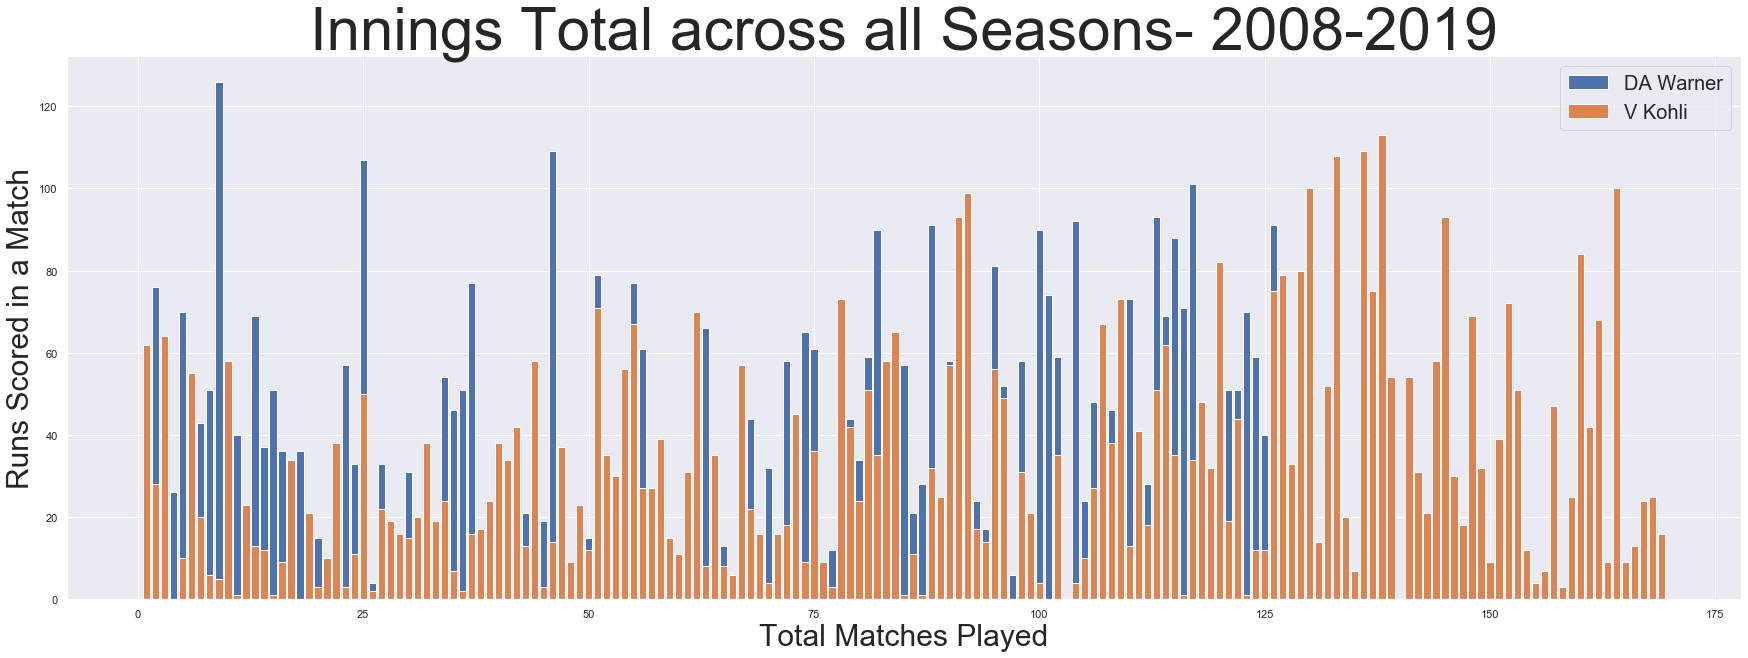

In [34]:
batsman_list_req=['DA Warner','V Kohli']
batsman=deliveries_data[deliveries_data.batsman.isin(batsman_list_req)]
batsman_run=batsman.groupby(['match_id','batsman']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
plt.figure(figsize=(30,10))
for name in batsman_list_req:
    batsman_check=batsman_run[batsman_run.batsman==name]
    batsman_check.index = np.arange(1, len(batsman_check) + 1)
    x=batsman_check.index
    y=batsman_check.Runs
    plt.bar(x,y)
plt.legend(batsman_list_req,prop={'size':20})
plt.title("Innings Total across all Seasons- 2008-2019",fontsize=60)
plt.xlabel("Total Matches Played",fontsize=30)
plt.ylabel("Runs Scored in a Match",fontsize=30)

### Wickets taken by Bowler across all Seasons

In [35]:
a=deliveries_data.copy()
a["player_dismissed"]=a["player_dismissed"].notnull()

In [36]:
for i in range(0,179078):
    if a["player_dismissed"].loc[i]==True:
        a["player_dismissed"].loc[i]==1

Text(0, 0.5, 'Wicktes taken in a Match')

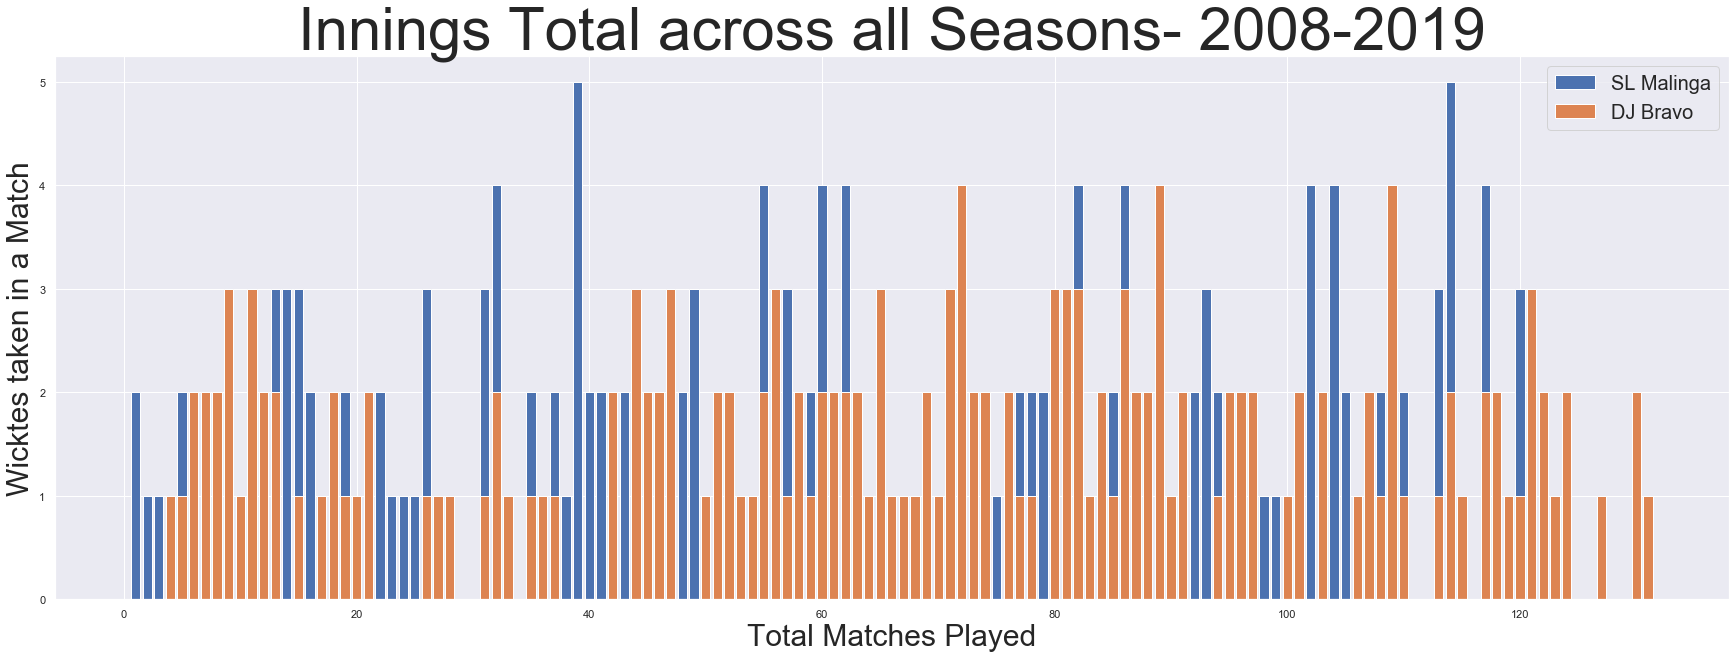

In [37]:
bowler_list_req=['SL Malinga','DJ Bravo']
bowler=a[a.bowler.isin(bowler_list_req)]
bowler_wicket=bowler.groupby(['match_id','bowler']).apply(lambda x:np.sum(x['player_dismissed'])).reset_index(name='Wickets')
plt.figure(figsize=(30,10))
for name in bowler_list_req:
    bowler_check=bowler_wicket[bowler_wicket.bowler==name]
    bowler_check.index = np.arange(1, len(bowler_check) + 1)
    x=bowler_check.index
    y=bowler_check.Wickets
    plt.bar(x,y)
plt.legend(bowler_list_req,prop={'size':20})
plt.title("Innings Total across all Seasons- 2008-2019",fontsize=60)
plt.xlabel("Total Matches Played",fontsize=30)
plt.ylabel("Wicktes taken in a Match",fontsize=30)

## Data Preprocessing

## Missing Data

In [38]:
deliveries_data.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

Dismissal Kind and Fielder Columns contain too many null values thus they will be dropped 

In [39]:
remove=['dismissal_kind', 'fielder']
deliveries_data.drop(labels=remove,axis=1,inplace=True)

In [40]:
# Replacing duplicate names
deliveries_data["batting_team"].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [41]:
deliveries_data.replace('Delhi Daredevils','Delhi Capitals',inplace = True)
deliveries_data.replace('Rising Pune Supergiant','Rising Pune Supergiants',inplace = True)

In [42]:
# Changing ID Numbers
deliveries_data["match_id"].unique()

array([    1,     2,     3,     4,     5,     6,     7,     8,     9,
          10,    11,    12,    13,    14,    15,    16,    17,    18,
          19,    20,    21,    22,    23,    24,    25,    26,    27,
          28,    29,    30,    31,    32,    33,    34,    35,    36,
          37,    38,    39,    40,    41,    42,    43,    44,    45,
          46,    47,    48,    49,    50,    51,    52,    53,    54,
          55,    56,    57,    58,    59,    60,    61,    62,    63,
          64,    65,    66,    67,    68,    69,    70,    71,    72,
          73,    74,    75,    76,    77,    78,    79,    80,    81,
          82,    83,    84,    85,    86,    87,    88,    89,    90,
          91,    92,    93,    94,    95,    96,    97,    98,    99,
         100,   101,   102,   103,   104,   105,   106,   107,   108,
         109,   110,   111,   112,   113,   114,   115,   116,   117,
         118,   119,   120,   121,   122,   123,   124,   125,   126,
         127,   128,

In [43]:
a=636
for i in range(7894,11416):
    if i in deliveries_data[deliveries_data["match_id"]>636]["match_id"].unique():
        a=a+1
    deliveries_data["match_id"].replace(i,a,inplace=True)

## Creating Columns

In [44]:
# Total Runs at End of Innings
temp=deliveries_data[["match_id","inning","total_runs"]]
temp.head()
temp=temp.groupby(["match_id","inning"]).sum()
temp=temp.rename(columns={"total_runs":"total"})
deliveries_data=deliveries_data.merge(temp,on=["match_id","inning"])
deliveries_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,total
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,207
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,207
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,207
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,207
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,207


In [45]:
# Current Score
for i in range(0,179078):
    deliveries_data["current_score"]=0
    
a=0
b=0
for i in range(0,179078):
    if(deliveries_data["inning"].iloc[i]==1):
        a=a+deliveries_data["total_runs"].iloc[i]
        deliveries_data["current_score"].iloc[i]=a
        b=0
    else:
        b=b+deliveries_data["total_runs"].iloc[i]
        deliveries_data["current_score"].iloc[i]=b
        a=0

C:\Users\91961\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
# Current Number of Wickets
deliveries_data["player_dismissed"]=deliveries_data["player_dismissed"].fillna(0)
a=0
b=0
for i in range(0,179078):
    if(deliveries_data["inning"].iloc[i]==1):
        b=0
        if(deliveries_data["player_dismissed"].iloc[i]!=0):
            a=a+1
            deliveries_data["player_dismissed"].iloc[i]=a
        else:
            deliveries_data["player_dismissed"].iloc[i]=a
    else:
        a=0
        if(deliveries_data["player_dismissed"].iloc[i]!=0):
            b=b+1
            deliveries_data["player_dismissed"].iloc[i]=b
        else:
            deliveries_data["player_dismissed"].iloc[i]=b

In [47]:
# Replacing match_id with id
deliveries_data=deliveries_data.rename(columns={"match_id":"id"})

# Merging both Dataset

In [48]:
df=matches_data.merge(deliveries_data,on="id")
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,total,current_score
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,0,207,0
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,0,207,0
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,0,207,4
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,0,207,4
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,0,207,6


In [49]:
df=df.sort_values(by=["date","inning"])
df=df.rename(columns={"player_dismissed":"wickets"})
df=df.reset_index()
df.head()

,index,id,season,city,date,team1,team2,toss_winner,toss_decision,result,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,wickets,total,current_score
0,13862,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,...,0,1,0,0,0,1,1,0,222,1
1,13863,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,...,0,0,0,0,0,0,0,0,222,1
2,13864,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,...,0,0,0,0,0,1,1,0,222,2
3,13865,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,...,0,0,0,0,0,0,0,0,222,2
4,13866,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,...,0,0,0,0,0,0,0,0,222,2


In [50]:
df.columns

Index(['index', 'id', 'season', 'city', 'date', 'team1', 'team2',
       'toss_winner', 'toss_decision', 'result', 'dl_applied', 'winner',
       'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue', 'inning',
       'batting_team', 'bowling_team', 'over', 'ball', 'batsman',
       'non_striker', 'bowler', 'is_super_over', 'wide_runs', 'bye_runs',
       'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs',
       'extra_runs', 'total_runs', 'wickets', 'total', 'current_score'],
      dtype='object')

In [51]:
# Required Columns
df=df[["date","venue",'inning', 'toss_winner','toss_decision','batting_team', 'bowling_team','over', 'ball', 
       'current_score',"wickets","total"]]
df.head()

,date,venue,inning,toss_winner,toss_decision,batting_team,bowling_team,over,ball,current_score,wickets,total
0,2008-04-18,M Chinnaswamy Stadium,1,Royal Challengers Bangalore,field,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,1,Royal Challengers Bangalore,field,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,1,Royal Challengers Bangalore,field,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,1,Royal Challengers Bangalore,field,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,1,Royal Challengers Bangalore,field,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,2,0,222


In [52]:
df.to_csv("ipl.csv")

# IPL Dataset

In [53]:
ipl=pd.read_csv("ipl.csv",index_col=0,parse_dates=["date"])
ipl.head()

,date,venue,inning,toss_winner,toss_decision,batting_team,bowling_team,over,ball,current_score,wickets,total
0,2008-04-18,M Chinnaswamy Stadium,1,Royal Challengers Bangalore,field,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,1,Royal Challengers Bangalore,field,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,1,Royal Challengers Bangalore,field,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,1,Royal Challengers Bangalore,field,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,1,Royal Challengers Bangalore,field,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,2,0,222


In [54]:
ipl.shape

(179078, 12)

In [55]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           179078 non-null  datetime64[ns]
 1   venue          179078 non-null  object        
 2   inning         179078 non-null  int64         
 3   toss_winner    179078 non-null  object        
 4   toss_decision  179078 non-null  object        
 5   batting_team   179078 non-null  object        
 6   bowling_team   179078 non-null  object        
 7   over           179078 non-null  int64         
 8   ball           179078 non-null  int64         
 9   current_score  179078 non-null  int64         
 10  wickets        179078 non-null  int64         
 11  total          179078 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 17.8+ MB


In [56]:
ipl.describe()

,inning,over,ball,current_score,wickets,total
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1.482952,10.162488,3.615587,74.752622,2.435966,157.575878
std,0.502074,5.677684,1.806966,48.528793,2.084691,30.449631
min,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000
25%,1.000000,5.000000,2.000000,35.000000,1.000000,138.000000
50%,1.000000,10.000000,4.000000,70.000000,2.000000,159.000000
75%,2.000000,15.000000,5.000000,110.000000,4.000000,179.000000
max,5.000000,20.000000,9.000000,334.000000,13.000000,263.000000


In [57]:
# Keeping Only Consistent Teams
ipl["batting_team"].unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kings XI Punjab',
       'Delhi Capitals', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions'], dtype=object)

In [58]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Capitals', 'Sunrisers Hyderabad']
ipl = ipl[(ipl['batting_team'].isin(consistent_teams)) & (ipl['bowling_team'].isin(consistent_teams))]

In [59]:
# Keeping only Consistent Venues
ipl["venue"].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'MA Chidambaram Stadium, Chepauk', 'Eden Gardens',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera',
       'Himachal Pradesh Cricket Association Stadium',
       'Subrata Roy Sahara Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'Barabati Stadium', 'Maharashtra Cricket Association Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Punjab Cricket Association IS Bi

In [60]:
# Replacing duplicate venue names
ipl.replace('M Chinnaswamy Stadium','M. Chinnaswamy Stadium')
ipl.replace('M. A. Chidambaram Stadium','MA Chidambaram Stadium, Chepauk')
ipl.replace('Feroz Shah Kotla','Feroz Shah Kotla Ground')
ipl.replace('Rajiv Gandhi Intl. Cricket Stadium','Rajiv Gandhi International Stadium, Uppal')
ipl.replace('IS Bindra Stadium','Punjab Cricket Association IS Bindra Stadium, Mohali')

,date,venue,inning,toss_winner,toss_decision,batting_team,bowling_team,over,ball,current_score,wickets,total
0,2008-04-18,M Chinnaswamy Stadium,1,Royal Challengers Bangalore,field,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,1,Royal Challengers Bangalore,field,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,1,Royal Challengers Bangalore,field,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,1,Royal Challengers Bangalore,field,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,1,Royal Challengers Bangalore,field,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,2,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...
179073,2019-12-05,Rajiv Gandhi Intl. Cricket Stadium,2,Mumbai Indians,bat,Chennai Super Kings,Mumbai Indians,20,2,152,5,157
179074,2019-12-05,Rajiv Gandhi Intl. Cricket Stadium,2,Mumbai Indians,bat,Chennai Super Kings,Mumbai Indians,20,3,154,5,157
179075,2019-12-05,Rajiv Gandhi Intl. Cricket Stadium,2,Mumbai Indians,bat,Chennai Super Kings,Mumbai Indians,20,4,155,6,157
179076,2019-12-05,Rajiv Gandhi Intl. Cricket Stadium,2,Mumbai Indians,bat,Chennai Super Kings,Mumbai Indians,20,5,157,6,157


In [61]:
consistent_venues=["Eden Gardens",'M. Chinnaswamy Stadium','Sawai Mansingh Stadium','Wankhede Stadium', 
                   'Punjab Cricket Association IS Bindra Stadium, Mohali','MA Chidambaram Stadium, Chepauk',
                   'Feroz Shah Kotla Ground','Rajiv Gandhi International Stadium, Uppal']
ipl = ipl[ipl['venue'].isin(consistent_venues)]
ipl.head()

,date,venue,inning,toss_winner,toss_decision,batting_team,bowling_team,over,ball,current_score,wickets,total
692,2008-04-20,Wankhede Stadium,1,Mumbai Indians,bat,Mumbai Indians,Royal Challengers Bangalore,1,1,0,0,165
693,2008-04-20,Wankhede Stadium,1,Mumbai Indians,bat,Mumbai Indians,Royal Challengers Bangalore,1,2,4,0,165
694,2008-04-20,Wankhede Stadium,1,Mumbai Indians,bat,Mumbai Indians,Royal Challengers Bangalore,1,3,4,0,165
695,2008-04-20,Wankhede Stadium,1,Mumbai Indians,bat,Mumbai Indians,Royal Challengers Bangalore,1,4,4,0,165
696,2008-04-20,Wankhede Stadium,1,Mumbai Indians,bat,Mumbai Indians,Royal Challengers Bangalore,1,5,8,0,165


(6.0, 0.0)

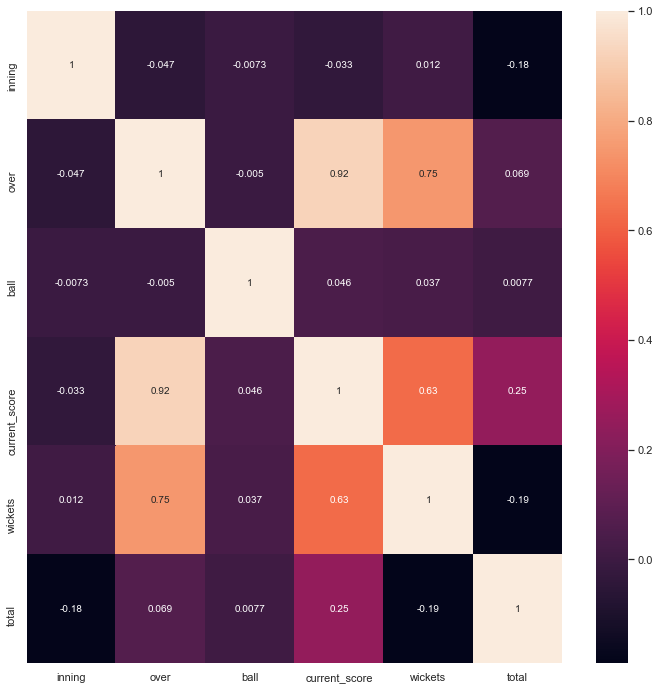

In [62]:
# Correlation Matrix & HeatMap
mpl.rcParams["figure.figsize"]=(12,12)
ax=sns.heatmap(ipl.corr(),annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

## Model Building (Only First Innings)

In [63]:
# We require minimum 5 Overs Data
# Only First Innings
ipl = ipl[ipl['over']>5]
ipl = ipl[ipl['inning']==1]
ipl=ipl.drop(labels="inning",axis=1)
ipl.head()

,date,venue,toss_winner,toss_decision,batting_team,bowling_team,over,ball,current_score,wickets,total
724,2008-04-20,Wankhede Stadium,Mumbai Indians,bat,Mumbai Indians,Royal Challengers Bangalore,6,1,42,2,165
725,2008-04-20,Wankhede Stadium,Mumbai Indians,bat,Mumbai Indians,Royal Challengers Bangalore,6,2,46,2,165
726,2008-04-20,Wankhede Stadium,Mumbai Indians,bat,Mumbai Indians,Royal Challengers Bangalore,6,3,46,2,165
727,2008-04-20,Wankhede Stadium,Mumbai Indians,bat,Mumbai Indians,Royal Challengers Bangalore,6,4,46,3,165
728,2008-04-20,Wankhede Stadium,Mumbai Indians,bat,Mumbai Indians,Royal Challengers Bangalore,6,5,47,3,165


In [64]:
# Converting categorical features using OneHotEncoding method
encoded_ipl = pd.get_dummies(data=ipl, columns=['batting_team', 'bowling_team', "venue", "toss_winner","toss_decision"])
encoded_ipl.columns

Index(['date', 'over', 'ball', 'current_score', 'wickets', 'total',
       'batting_team_Chennai Super Kings', 'batting_team_Delhi Capitals',
       'batting_team_Kings XI Punjab', 'batting_team_Kolkata Knight Riders',
       'batting_team_Mumbai Indians', 'batting_team_Rajasthan Royals',
       'batting_team_Royal Challengers Bangalore',
       'batting_team_Sunrisers Hyderabad', 'bowling_team_Chennai Super Kings',
       'bowling_team_Delhi Capitals', 'bowling_team_Kings XI Punjab',
       'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians',
       'bowling_team_Rajasthan Royals',
       'bowling_team_Royal Challengers Bangalore',
       'bowling_team_Sunrisers Hyderabad', 'venue_Eden Gardens',
       'venue_Feroz Shah Kotla Ground', 'venue_M. Chinnaswamy Stadium',
       'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Punjab Cricket Association IS Bindra Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'venue_Sawai Mansingh St

In [65]:
encoded_ipl=encoded_ipl[["date",'venue_Eden Gardens','venue_Feroz Shah Kotla Ground', 'venue_M. Chinnaswamy Stadium',
                         'venue_MA Chidambaram Stadium, Chepauk','venue_Punjab Cricket Association IS Bindra Stadium, Mohali',
                         'venue_Rajiv Gandhi International Stadium, Uppal','venue_Sawai Mansingh Stadium',
                         'venue_Wankhede Stadium','batting_team_Chennai Super Kings','batting_team_Delhi Capitals', 
                       'batting_team_Kings XI Punjab','batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians',
                       'batting_team_Rajasthan Royals','batting_team_Royal Challengers Bangalore','batting_team_Sunrisers Hyderabad',
                       'bowling_team_Chennai Super Kings','bowling_team_Delhi Capitals', 'bowling_team_Kings XI Punjab',
                       'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians','bowling_team_Rajasthan Royals',
                       'bowling_team_Royal Challengers Bangalore','bowling_team_Sunrisers Hyderabad','toss_winner_Chennai Super Kings', 
                       'toss_winner_Delhi Capitals','toss_winner_Kings XI Punjab', 'toss_winner_Kolkata Knight Riders',
                       'toss_winner_Mumbai Indians', 'toss_winner_Rajasthan Royals','toss_winner_Royal Challengers Bangalore',
                       'toss_winner_Sunrisers Hyderabad','toss_decision_bat','toss_decision_field',
                       'over', 'ball', 'current_score','wickets','total']]
encoded_ipl.head()

,date,venue_Eden Gardens,venue_Feroz Shah Kotla Ground,venue_M. Chinnaswamy Stadium,"venue_MA Chidambaram Stadium, Chepauk","venue_Punjab Cricket Association IS Bindra Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal",venue_Sawai Mansingh Stadium,venue_Wankhede Stadium,batting_team_Chennai Super Kings,...,toss_winner_Rajasthan Royals,toss_winner_Royal Challengers Bangalore,toss_winner_Sunrisers Hyderabad,toss_decision_bat,toss_decision_field,over,ball,current_score,wickets,total
724,2008-04-20,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,6,1,42,2,165
725,2008-04-20,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,6,2,46,2,165
726,2008-04-20,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,6,3,46,2,165
727,2008-04-20,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,6,4,46,3,165
728,2008-04-20,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,6,5,47,3,165


In [66]:
# Splitting the data into train and test set
X_train = encoded_ipl.drop(labels='total', axis=1)[encoded_ipl['date'].dt.year <= 2018]
X_test = encoded_ipl.drop(labels='total', axis=1)[encoded_ipl['date'].dt.year > 2018]
y_train = encoded_ipl[encoded_ipl['date'].dt.year <= 2018]['total'].values
y_test = encoded_ipl[encoded_ipl['date'].dt.year > 2018]['total'].values

In [67]:
# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

## Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression()
model_linear.fit(X_train,y_train)
predict_linear=model_linear.predict(X_test)

In [75]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predict_linear))
print('MSE:', metrics.mean_squared_error(y_test, predict_linear))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict_linear)))
print('R2 Score:', metrics.r2_score(y_test, predict_linear))

MAE: 16.91425088914728
MSE: 526.9012887079479
RMSE: 22.95433050010276
R2 Score: 0.23137447591803173


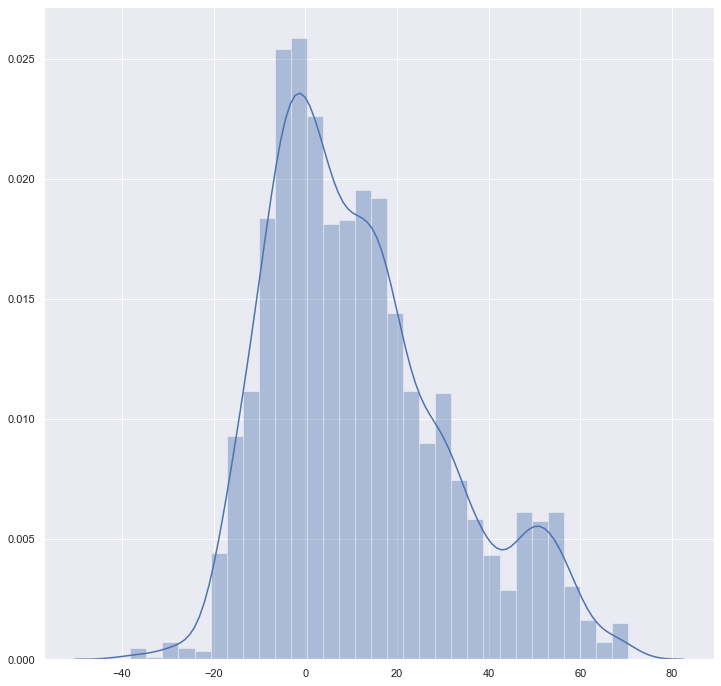

In [73]:
sns.distplot(y_test-predict_linear)

## Ridge Regression

In [132]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[1000,5000,10000,15000,20000]}
model_ridge=GridSearchCV(ridge,parameters,scoring='r2',cv=5)
model_ridge.fit(X_train,y_train)
print(model_ridge.best_params_)
print(model_ridge.best_estimator_)
print(model_ridge.best_score_)

{'alpha': 20000}
Ridge(alpha=20000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
0.3495138166612419


In [133]:
predict_ridge=model_ridge.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predict_ridge))
print('MSE:', metrics.mean_squared_error(y_test, predict_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict_ridge)))
print('R2 Score:', metrics.r2_score(y_test, predict_ridge))

MAE: 16.764988944620594
MSE: 511.35218417056933
RMSE: 22.61309762439833
R2 Score: 0.2540569761892967


## Lasso Regression

In [140]:
from sklearn.linear_model import Lasso
lasso=Lasso()
parameters={'alpha':[1e-2,1e-1,1,10]}
model_lasso=GridSearchCV(lasso,parameters,scoring='r2',cv=5)
model_lasso.fit(X_train,y_train)
print(model_lasso.best_params_)
print(model_lasso.best_estimator_)
print(model_lasso.best_score_)

{'alpha': 0.1}
Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
0.3015608592708119


In [141]:
predict_lasso=model_lasso.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predict_lasso))
print('MSE:', metrics.mean_squared_error(y_test, predict_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict_lasso)))
print('R2 Score:', metrics.r2_score(y_test, predict_lasso))

MAE: 16.898027813359974
MSE: 518.7918654369574
RMSE: 22.777002995059675
R2 Score: 0.24320422438373035


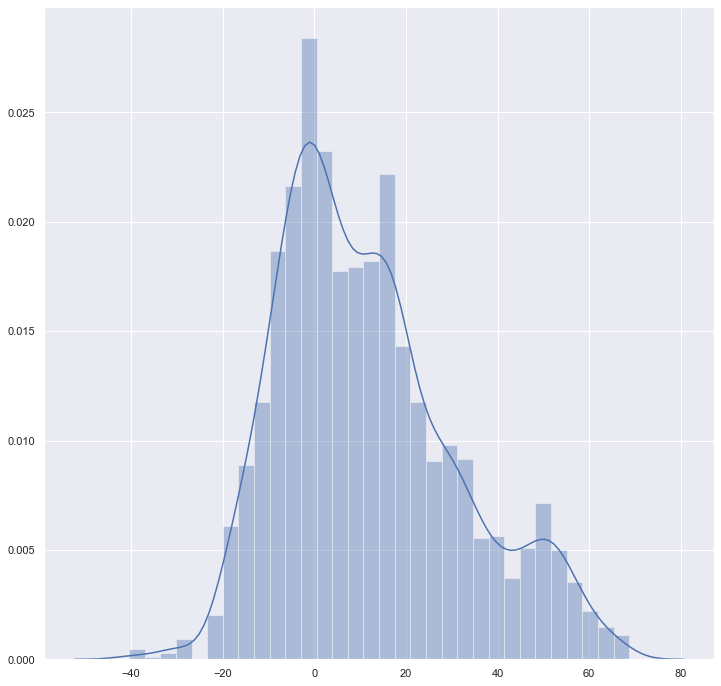

In [142]:
sns.distplot(y_test-predict_lasso)

## Decision Tree Regressor

In [149]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor()
parameters={'max_depth':[2,4,8,10]}
model_DTR=GridSearchCV(DTR,parameters,scoring='r2',cv=5)
model_DTR.fit(X_train,y_train)
print(model_DTR.best_params_)
print(model_DTR.best_estimator_)
print(model_DTR.best_score_)

{'max_depth': 8}
DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
0.37184555425181176


In [150]:
predict_DTR=model_DTR.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predict_DTR))
print('MSE:', metrics.mean_squared_error(y_test, predict_DTR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict_DTR)))
print('R2 Score:', metrics.r2_score(y_test, predict_DTR))

MAE: 17.524504854998273
MSE: 583.6535156430301
RMSE: 24.15892207121481
R2 Score: 0.14858627420806247


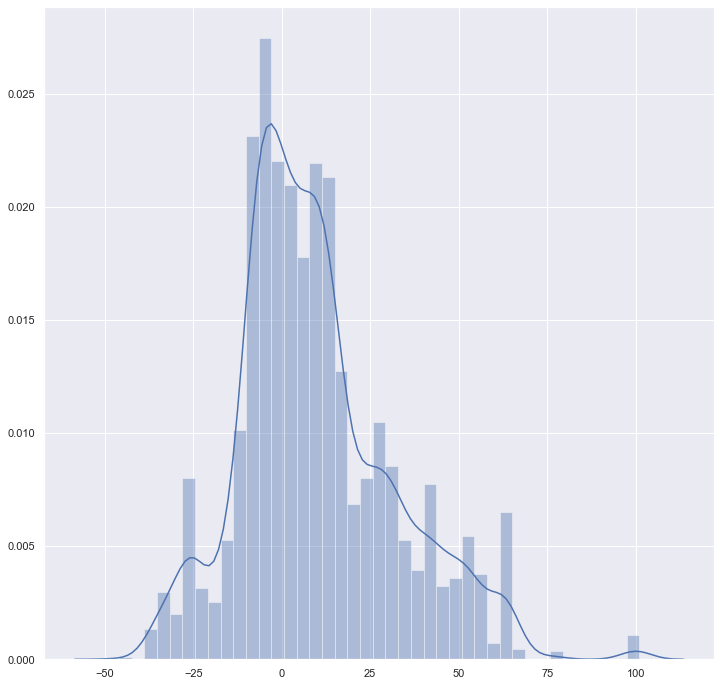

In [152]:
sns.distplot(y_test-predict_DTR)

## Random Forest Regressor

In [156]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
parameters={'max_depth':[2,4,8],"n_estimators":[10,100,200]}
model_RFR=GridSearchCV(RFR,parameters,scoring='r2',cv=5)
model_RFR.fit(X_train,y_train)
print(model_RFR.best_params_)
print(model_RFR.best_estimator_)
print(model_RFR.best_score_)

{'max_depth': 8, 'n_estimators': 300}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
0.45134958035947287


In [155]:
predict_RFR=model_RFR.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predict_RFR))
print('MSE:', metrics.mean_squared_error(y_test, predict_RFR))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict_RFR)))
print('R2 Score:', metrics.r2_score(y_test, predict_RFR))

MAE: 16.0754676845309
MSE: 510.5013946889788
RMSE: 22.594277919176324
R2 Score: 0.2552980786978416


## XGBoost Regressor

In [158]:
import xgboost as xgb
xgb = xgb.XGBRegressor()
parameters = {'gamma':[0,0.03,0.1,0.3],'learning_rate':[1e-3,1e-2,1e-1],'max_depth':[2,4,8],'n_estimators':[10,100,200]}
model_xgb = GridSearchCV(estimator = xgb, param_grid = parameters, scoring='r2', cv=5)
model_xgb.fit(X_train,y_train)
print(model_xgb.best_params_)
print(model_xgb.best_estimator_)
print(model_xgb.best_score_)

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
0.5024662793879795


In [159]:
predict_xgb=model_xgb.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predict_xgb))
print('MSE:', metrics.mean_squared_error(y_test, predict_xgb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict_xgb)))
print('R2 Score:', metrics.r2_score(y_test, predict_xgb))

MAE: 16.00956225793946
MSE: 498.0830612717027
RMSE: 22.31777455911997
R2 Score: 0.27341351746339204


In [160]:
import pickle
filename = 'first-innings-score-model.pkl'
pickle.dump(model_xgb, open(filename, 'wb'))